# **NYC Urban Park Rangers Animal Condition Response Analysis**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0TqgLf2BaPJeu1tcwd_PamxvjshJ9GpgbQA&usqp=CAU)

Urban Park Rangers are the stewards of public parks in New York City. Part of their responsibilities include receiving calls from the public regarding animals in need of assistance, and educating about wildlife found in the parks.

This dataset comes from NYC Open Data and contains information regarding animal assistance requests to the Urban Park Rangers in New York City between 2018 and 2021. 

I began by cleaning the dataset and conducted exploratory data analysis to uncover interesting insights about the data.

Dataset source: https://data.cityofnewyork.us/Environment/Urban-Park-Ranger-Animal-Condition-Response/fuhs-xmg2

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats

sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('file:///Users/joeyl/Downloads/Urban_Park_Ranger_Animal_Condition_Response.csv')

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,Age,Animal Class,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,Adult,Birds,311-06712416,ACC,6.0,False,False,NaN,NaN,False,False,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,Infant,Birds,311-06714879,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,Juvenile,Deer,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,Adult;#Juvenile,Small Mammals-RVS,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,Juvenile,Small Mammals-non RVS,311-06699415,ACC,1.0,False,False,NaN,NaN,False,False,119833


For the purposes of this project, I will not conduct analysis on the "Duration of Response" column because no units were given in the explanation of the columns or data dictionary.

Let's retrieve basic summary information about this dataset. There are 22 columns and 2609 rows. Each row represents one request to the Urban Park Rangers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date and Time of initial call     2609 non-null   object 
 1   Date and time of Ranger response  2609 non-null   object 
 2   Borough                           2609 non-null   object 
 3   Property                          2608 non-null   object 
 4   Location                          2570 non-null   object 
 5   Species Description               2609 non-null   object 
 6   Call Source                       2609 non-null   object 
 7   Species Status                    2593 non-null   object 
 8   Animal Condition                  2219 non-null   object 
 9   Duration of Response              2609 non-null   float64
 10  Age                               2609 non-null   object 
 11  Animal Class                      2609 non-null   object 
 12  311SR 

The data types of some columns will need to be changed to facilitate analysis. Let's give the columns simpler or more meaningful names, converting to appropriate data types, and creating several new columns from existing variables.

In [7]:
# rename columns
df.rename(columns={
    'Date and Time of initial call': 'call_datetime',
    'Date and time of Ranger response' : 'response_datetime',
    'Species Description': 'species',
    '# of Animals': 'num_animals',
    'Hours spent monitoring': 'hours_monitoring'},
    inplace=True)

In [8]:
# convert datetime columns to datetime data type
df['call_datetime'] = pd.to_datetime(df['call_datetime'])
df['response_datetime'] = pd.to_datetime(df['response_datetime'])

In [40]:
# extract difference in time between response and call
df['call_response_diff_hrs'] = (df['response_datetime'] - df['call_datetime'])

In [41]:
# convert 'call_response_diff' column to hours
df['call_response_diff_hrs'] = df['call_response_diff_hrs'] / np.timedelta64(1, 'h')

In [112]:
# extract 'year' from 'response_datetime'
# extract 'month' from 'response_datetime'
# extract 'hour' from 'response_datetime'
# extract 'weekday' from 'response_datetime'
df['year'] = df['response_datetime'].dt.year
df['month'] = df['response_datetime'].dt.month
df['hour'] = df['response_datetime'].dt.hour
df['weekday'] = df['response_datetime'].dt.weekday

In [2]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.describe()

# what unit is duration of response?

,Duration of Response,# of Animals,Hours spent monitoring
count,2609.000000,2605.000000,353.000000
mean,1.373672,1.446833,0.983144
std,1.137301,18.165372,1.061440
min,0.000000,0.000000,0.100000
25%,0.500000,1.000000,0.500000
50%,1.000000,1.000000,0.500000
75%,2.000000,1.000000,1.000000
max,21.000000,900.000000,10.000000


Next, we'll check for duplicated rows. With the large number of columns describing characteristics of each request, it seems improbable that two rows would happen to have exactly the same values. Thus, any duplicated rows are likely errors and should be dropped.

In [6]:
# check for duplicated rows
df.duplicated().sum()

0

There are no duplicated rows, so dropping rows is not needed. Next, I'll take a closer look at the values in the 'Property' column to see if there are misspelled names that can be consolidated.

In [14]:
# sort and inspect 'Property' column for string cleaning
pd.set_option('display.max_rows', None)
df['Property'].value_counts().reset_index().sort_values(by='index') 

,index,Property
305,406 Woodward Avenue,1
232,5 East 102nd St,1
188,851 Fairmont Pl,1
385,Abingdon Square,1
368,Aesop Park,1
166,Albert J. Parham Playground,1
106,Alice Austen Park,2
374,Alley Athletic Playground,1
11,Alley Pond Park,48
299,Alley Pond Park Oakland Lake,1


In [9]:
# clean misspelled strings in 'Property' column
df.loc[df['Property']=='Cenral Park', 'Property'] = 'Central Park'
df.loc[df['Property']=='Centrail Park', 'Property'] = 'Central Park'
df.loc[df['Property']=='Coney Island Beach &amp; Boardwalk', 'Property'] = 'Coney Island Beach and Boardwalk'
df.loc[df['Property']=='Green street', 'Property'] = 'Green Street' 
df.loc[df['Property']=='Green street at Intersection of 120th Street and Marsden Avenue', 'Property'] = 'Green Street' 
df.loc[df['Property']=='Greenstreet across 269 Cambridge Avenue', 'Property'] = 'Green Street' 
df.loc[df['Property']=='Greenbelt Nature center', 'Property'] = 'Greenbelt Nature Center' 
df.loc[df['Property']=='Historic Richmondtown', 'Property'] = 'Historic Richmond Town' 
df.loc[df['Property']=='Historic Richmond town', 'Property'] = 'Historic Richmond Town' 
df.loc[df['Property']=='Owls Head Park', 'Property'] = "Owl's Head Park"
df.loc[df['Property']=='Park Of The Americas', 'Property'] = 'Park of the Americas'
df.loc[df['Property']=='Prospect park', 'Property'] = 'Prospect Park'
df.loc[df['Property']=='Red Hook Park.', 'Property'] = 'Red Hook Park'
df.loc[df['Property']=='Schmul Park 40.589434, -74.187249', 'Property'] = 'Schmul Park'
df.loc[df['Property']=='Washingtom Square Park', 'Property'] = 'Washington Square Park'
df.loc[df['Property']=='William T Davis Wildlife Refuge', 'Property'] = 'William T. Davis Wildlife Refuge'

In [68]:
df['Property'].value_counts().reset_index().sort_values(by='index') 

,index,Property
297,406 Woodward Avenue,1
229,5 East 102nd St,1
190,851 Fairmont Pl,1
371,Abingdon Square,1
354,Aesop Park,1
178,Albert J. Parham Playground,1
111,Alice Austen Park,2
360,Alley Athletic Playground,1
11,Alley Pond Park,48
303,Alley Pond Park Oakland Lake,1


In [7]:
df['Borough'].value_counts()

Manhattan        960
Brooklyn         461
Queens           458
Staten Island    452
Bronx            278
Name: Borough, dtype: int64

Next, I'll standardize the capitalization of the 'species' column. This will help to consolidate duplicated species names that happen to be capitalized differently.

In [10]:
# standardize capitalization of 'species' column
df['species'] = df['species'].str.title()

In [15]:
df['Location'].value_counts()

Blue Heron Nature Center                                                                                                                                                                                         19
Harlem Meer                                                                                                                                                                                                      13
Van Cortlandt Lake                                                                                                                                                                                               12
Oakland Lake                                                                                                                                                                                                     11
Willowbrook Lake                                                                                                                                        

In [16]:
df['Species Description'].value_counts()

Raccoon                           784
Canada Goose                      176
Red-tailed Hawk                   121
Eastern Gray Squirrel              97
Mallard Duck                       73
Chicken                            73
White-tailed Deer                  68
Cat                                64
Domestic Duck                      62
Mute Swan                          58
Dog                                56
Virginia Opossum                   55
Herring Gull                       42
Rock Dove                          40
Double-crested Cormorant           36
Striped Skunk                      35
raccoon                            34
Bird (Unknown)                     34
American Robin                     31
Common Snapping Turtle             30
Red-Eared Slider                   24
Red-eared Slider                   22
Gull (Unknown)                     19
Eastern Coyote                     18
Domestic Rabbit                    18
Great Blue Heron                   18
House Sparro

In [17]:
df['Call Source'].value_counts()

Employee                             823
Public                               582
Central                              539
Conservancies/"Friends of" Groups    403
Observed by Ranger                   157
Other                                105
Name: Call Source, dtype: int64

In [18]:
df['Species Status'].value_counts()

Native      2103
Domestic     329
Invasive     115
Exotic        46
Name: Species Status, dtype: int64

In [20]:
df['Age'].value_counts()

Adult                      1885
Juvenile                    540
Infant                      148
Adult;#Juvenile              17
Adult;#Infant                 8
Juvenile;#Adult               5
Adult;#Juvenile;#Infant       3
Infant;#Adult                 2
Juvenile;#Infant              1
Name: Age, dtype: int64

In [21]:
df.query('Age=="Adult;#Juvenile"')

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,Age,Animal Class,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,Adult;#Juvenile,Small Mammals-RVS,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
39,06/13/2021 01:59:00 PM,06/13/2021 02:05:00 PM,Staten Island,Clove Lakes Park,Brooke's Pond,Catfish,Employee,Native,DOA,1.00,Adult;#Juvenile,Fish-numerous quantity,NaN,Advised/Educated others,12.0,False,False,NaN,NaN,False,False,NaN
315,03/27/2021 05:30:00 PM,03/27/2021 05:31:00 PM,Queens,Forest Park,Bandshell area,Striped Skunk,Central,Native,Healthy,1.00,Adult;#Juvenile,Small Mammals-RVS,NaN,Monitored Animal,2.0,False,True,NaN,0.50,False,False,NaN
393,02/01/2021 10:00:00 AM,02/04/2021 08:30:00 AM,Bronx,Palmer Inlet,Palmer Inlet,Mute Swan,Other,Invasive,Healthy,3.00,Adult;#Juvenile,Birds,NaN,Monitored Animal,5.0,False,True,NaN,1.50,False,False,NaN
562,11/16/2020 03:44:00 PM,11/16/2020 03:45:00 PM,Staten Island,Silver Lake Park,Forest Ave and Havenwood Rd,Wild Turkey,Observed by Ranger,Native,Healthy,0.25,Adult;#Juvenile,Birds,NaN,Monitored Animal,18.0,False,False,NaN,NaN,False,False,NaN
827,07/28/2020 01:35:00 PM,07/28/2020 01:45:00 PM,Staten Island,Owl Hollow Fields,Entrance,Striped Skunk,Central,Native,NaN,0.50,Adult;#Juvenile,Small Mammals-RVS,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
846,07/21/2020 10:00:00 AM,07/21/2020 11:00:00 AM,Manhattan,Highbridge Recreation Center,"Raccoons were hiding behind a foldable table, ...",Raccoon,Employee,Native,Healthy,0.50,Adult;#Juvenile,Small Mammals-RVS,311-03284626,Relocated/Condition Corrected,2.0,False,False,NaN,NaN,False,False,NaN
858,07/17/2020 10:00:00 AM,07/17/2020 02:00:00 PM,Bronx,Van Cortlandt Park,Golf House,Mute Swan,"Conservancies/""Friends of"" Groups",Invasive,Healthy,1.50,Adult;#Juvenile,Birds,NaN,Monitored Animal,7.0,False,True,NaN,0.75,False,False,NaN
894,07/07/2020 09:00:00 AM,07/07/2020 09:00:00 AM,Manhattan,Central Park,Conservatory Water,Mallard Duck,Employee,Native,Healthy,0.30,Adult;#Juvenile,Birds,NaN,Advised/Educated others,4.0,False,False,NaN,NaN,False,False,NaN
932,06/24/2020 12:50:00 PM,06/24/2020 02:00:00 PM,Bronx,Pelham Bay Park,Hunter Island (Kazimiroff Trail),Eastern Coyote,Employee,Native,NaN,1.00,Adult;#Juvenile,Coyotes,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN


With cleaning done, we can start asking some questions. 

What are the most species that show up the most in animal assistance requests?

In [76]:
# What are the most frequent species in animal assistance requests?
most_freq_species = df['species'].value_counts().reset_index().head(10).rename(columns={'index': 'Species', 'species': 'Number of Calls'})
most_freq_species

,Species,Number of Calls
0,Raccoon,818
1,Canada Goose,177
2,Red-Tailed Hawk,126
3,Eastern Gray Squirrel,97
4,Mallard Duck,76
5,Chicken,73
6,White-Tailed Deer,71
7,Cat,64
8,Domestic Duck,62
9,Mute Swan,58


Text(0.5, 1.0, 'Top 10 Species by Total Calls')

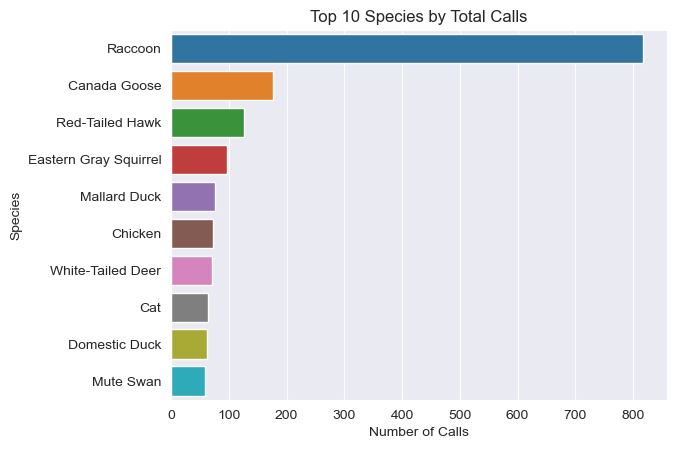

In [78]:
sns.barplot(data=most_freq_species, y='Species', x='Number of Calls', orient='h')
plt.title('Top 10 Species by Total Calls')

Raccoons are by far the most frequent species reported in requests to the Urban Park Rangers. This makes sense considering that raccoons are both ubiquitous and potentially dangerous if afflicted with canine distemper, which makes it necessary to alert professionals to humanely euthanize the raccoon. The next most frequently involved species is the Canada Goose, followed by the Red-Tailed Hawk.

In [99]:
# What are the top species involved in calls, by borough?
species_by_borough = df.groupby('Borough')['species'].value_counts().to_frame()
species_by_borough

species
Borough       species                                
Bronx         Raccoon                              48
              Canada Goose                         22
              Mute Swan                            17
              Cat                                  16
              White-Tailed Deer                    15
              Striped Skunk                        13
              Chicken                              12
              Virginia Opossum                     12
              Eastern Coyote                       10
              Red-Tailed Hawk                       9
              Mallard Duck                          8
              Red-Eared Slider                      8
              Rock Dove                             8
              Dog                                   7
              Eastern Gray Squirrel                 6
              Domestic Duck                         5
              Bird (Unknown)                        4
              Common Snapping Turtle                4
              Bat (Unknown)                         3
              Harbor Seal                           3
              Herring Gull                          3
              Snow Goose                            3
              Domestic Rabbit                       2
              Double-Crested Cormorant              2
              Guinea Pig                            2
              Gull (Unknown)                        2
              Painted Turtle                        2
              Red-Shouldered Hawk                   2
              Alligator Snapping Turtle             1
              American Crow                         1
              American Kestrel                      1
              American Robin                        1
              Argentine Black And White Tegu        1
              Barn Swallow                          1
              Barred Owl                            1
              Bearded Dragon                        1
              Black Racer Snake                     1
              Cockatiel                             1
              Common Grackle                        1
              Cooper'S Hawk                         1
              Corn Snake                            1
              European Starling                     1
              Great Black-Backed Gull               1
              Great Horned Owl                      1
              Green Heron                           1
              Guineafowl                            1
              Harp Seal                             1
              House Sparrow                         1
              Muscovy Duck                          1
              Ovenbird                              1
              Parrot (Unknown)                      1
              Peafowl                               1
              Red Fox                               1
              Red-Winged Blackbird                  1
              Scaup                                 1
              Seal (Unknown)                        1
              Sparrow                               1
              Turtle (Unknown)                      1
Brooklyn      Raccoon                             172
              Eastern Gray Squirrel                27
              Cat                                  20
              Canada Goose                         18
              Mute Swan                            15
              Red-Tailed Hawk                      15
              Bird (Unknown)                       14
              Dog                                  14
              Chicken                              13
              Virginia Opossum                     13
              Mallard Duck                         10
              Red-Eared Slider                      9
              Rock Dove                             6
              Domestic Rabbit                       5
              Herring Gull                        

Next, we use the columns we created earlier to calculate the average difference between call and response times, per borough. This will tell us how long it typically takes for Rangers to respond to requests after they are called in.

In [283]:
# What is the average difference between call and response time, per borough?
response_by_borough = df.groupby('Borough')['call_response_diff_hrs'].median().reset_index().sort_values(by='call_response_diff_hrs')
response_by_borough

,Borough,call_response_diff_hrs
0,Bronx,0.166667
3,Queens,0.166667
1,Brooklyn,0.250000
2,Manhattan,0.250000
4,Staten Island,0.250000


In [282]:
# For the most frequently reported species, what is the average difference between call and response time, per species?
response_by_species = df[df['species'].isin(most_freq_species['Species'])].groupby('species')['call_response_diff_hrs'].median().reset_index().sort_values(by='call_response_diff_hrs')
response_by_species

,species,call_response_diff_hrs
1,Cat,0.208333
0,Canada Goose,0.250000
4,Eastern Gray Squirrel,0.250000
6,Mute Swan,0.250000
7,Raccoon,0.250000
8,Red-Tailed Hawk,0.250000
9,White-Tailed Deer,0.250000
3,Domestic Duck,0.308333
2,Chicken,0.333333
5,Mallard Duck,0.375000


In [278]:
df.query('species=="Eastern Gray Squirrel"')

,call_datetime,response_datetime,Borough,Property,Location,species,Call Source,Species Status,Animal Condition,Duration of Response,Age,Animal Class,311SR Number,Final Ranger Action,num_animals,PEP Response,Animal Monitored,Rehabilitator,hours_monitoring,Police Response,ESU Response,ACC Intake Number,call_response_diff_hrs,year,month,hour,weekday
11,2021-06-22 12:00:00,2021-06-22 12:00:00,Manhattan,Inwood Hill Park,214th and Seaman Ave,Eastern Gray Squirrel,Employee,Native,Injured,0.50,Adult,Small Mammals-non RVS,NaN,Advised/Educated others,1.0,False,True,NaN,0.50,False,False,NaN,0.000000,2021,6,12,1
58,2021-06-09 14:30:00,2021-06-09 14:30:00,Brooklyn,Prospect Park,East Drive V/O Zucker Playground,Eastern Gray Squirrel,Public,Native,DOA,0.50,Adult,Small Mammals-non RVS,NaN,Relocated/Condition Corrected,1.0,False,False,NaN,NaN,False,False,NaN,0.000000,2021,6,14,2
111,2021-05-26 11:00:00,2021-05-26 12:00:00,Manhattan,Madison Square Park,North of Ferrgut Statue,Eastern Gray Squirrel,Central,Native,Unhealthy,0.50,Adult,Small Mammals-non RVS,311-06391894,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,1.000000,2021,5,12,2
170,2021-05-11 14:00:00,2021-05-11 14:00:00,Bronx,Barretto Point Park,Restrooms,Eastern Gray Squirrel,Public,Native,DOA,2.00,Juvenile,Small Mammals-non RVS,NaN,Relocated/Condition Corrected,1.0,False,False,NaN,NaN,False,False,NaN,0.000000,2021,5,14,1
174,2021-05-10 13:00:00,2021-05-10 14:00:00,Manhattan,Playground Eighty Nine LXXXIX,In the Horticulture area of the Playground,Eastern Gray Squirrel,Employee,Native,Injured,0.50,Juvenile,Small Mammals-non RVS,311-06218645,Rehabilitator,1.0,False,False,Wild Bird Fund,NaN,False,False,NaN,1.000000,2021,5,14,0
210,2021-04-28 13:30:00,2021-04-28 13:45:00,Staten Island,Westerleigh Park,Under a tree by the gazebo,Eastern Gray Squirrel,Employee,Native,Injured,2.00,Juvenile,Small Mammals-non RVS,NaN,Relocated/Condition Corrected,1.0,False,True,NaN,0.25,False,False,NaN,0.250000,2021,4,13,2
227,2021-04-24 12:26:00,2021-04-24 12:30:00,Queens,Fort Totten Park,Building 134,Eastern Gray Squirrel,Public,Native,Healthy,3.00,Juvenile,Small Mammals-non RVS,311-06061449,Rehabilitator,3.0,False,False,Wild Bird Fund,NaN,False,False,NaN,0.066667,2021,4,12,5
238,2021-04-21 17:30:00,2021-04-21 17:40:00,Queens,Cunningham Park,210th St and 68th Ave,Eastern Gray Squirrel,Public,Native,DOA,1.00,Adult,Small Mammals-non RVS,NaN,Advised/Educated others,1.0,False,False,NaN,NaN,False,False,NaN,0.166667,2021,4,17,2
249,2021-04-18 10:15:00,2021-04-18 10:45:00,Queens,Mafera Park,65th Pl and 68th Ave,Eastern Gray Squirrel,Central,Native,DOA,0.50,Adult,Small Mammals-non RVS,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,0.500000,2021,4,10,6
290,2021-04-06 11:30:00,2021-04-06 11:30:00,Manhattan,Washington Square Park,park,Eastern Gray Squirrel,Employee,Native,Healthy,0.25,Infant,Small Mammals-non RVS,NaN,Advised/Educated others,1.0,False,False,NaN,NaN,False,False,NaN,0.000000,2021,4,11,1


In [281]:
df.query('species=="White-Tailed Deer"')

,call_datetime,response_datetime,Borough,Property,Location,species,Call Source,Species Status,Animal Condition,Duration of Response,Age,Animal Class,311SR Number,Final Ranger Action,num_animals,PEP Response,Animal Monitored,Rehabilitator,hours_monitoring,Police Response,ESU Response,ACC Intake Number,call_response_diff_hrs,year,month,hour,weekday
2,2021-06-23 14:30:00,2021-06-23 14:30:00,Bronx,Pelham Bay Park,Pelham Bay South,White-Tailed Deer,Employee,Native,NaN,1.00,Juvenile,Deer,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,0.000000,2021,6,14,2
124,2021-05-24 10:00:00,2021-05-24 10:32:00,Staten Island,Conference House Park,"Next to sidewalk along Statterlee St., between Conference House and Ward House",White-Tailed Deer,Employee,Native,DOA,1.00,Adult,Deer,NaN,Advised/Educated others,1.0,False,False,NaN,NaN,False,False,NaN,0.533333,2021,5,10,0
146,2021-05-19 16:30:00,2021-05-19 16:30:00,Bronx,Pelham Bay Park,Turtle Cove,White-Tailed Deer,Employee,Native,Injured,3.00,Adult,Deer,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,0.000000,2021,5,16,2
325,2021-03-18 11:30:00,2021-03-19 10:40:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,White-Tailed Deer,Public,Native,DOA,1.00,Adult,Deer,NaN,Advised/Educated others,1.0,False,True,NaN,0.50,False,False,NaN,23.166667,2021,3,10,4
326,2021-03-18 11:30:00,2021-03-18 11:45:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,White-Tailed Deer,Public,Native,Injured,1.00,Adult,Deer,NaN,Monitored Animal,1.0,False,True,NaN,0.50,False,False,NaN,0.250000,2021,3,11,3
333,2021-03-11 09:30:00,2021-03-11 10:00:00,Staten Island,Clove Lakes Park,In woods behind Ice Skating Rink,White-Tailed Deer,Public,Native,DOA,6.00,Adult,Deer,311-05651263,Relocated/Condition Corrected,1.0,True,False,NaN,NaN,True,False,NaN,0.500000,2021,3,10,3
339,2021-03-09 09:10:00,2021-03-09 09:16:00,Staten Island,Greenbelt White trail,Ashworth Ave. and Lovell Ave.,White-Tailed Deer,Central,Native,Injured,0.75,Adult,Deer,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN,0.100000,2021,3,9,1
341,2021-03-07 09:00:00,2021-03-07 12:40:00,Staten Island,Joseph Manna Park,In shrubs,White-Tailed Deer,Employee,Native,DOA,1.00,Juvenile,Deer,NaN,Advised/Educated others,1.0,False,False,NaN,NaN,False,False,NaN,3.666667,2021,3,12,6
345,2021-03-04 17:00:00,2021-03-04 16:45:00,Bronx,Pelham Bay Park,Twin Island Shoreline,White-Tailed Deer,Public,Native,DOA,0.75,Juvenile,Deer,NaN,Relocated/Condition Corrected,1.0,False,False,NaN,NaN,False,False,NaN,-0.250000,2021,3,16,3
351,2021-03-03 09:00:00,2021-03-03 09:30:00,Staten Island,William T. Davis Wildlife Refuge,Behind the Parks house at 2226 Richmond Ave,White-Tailed Deer,Employee,Native,Injured,2.00,Adult,Deer,311-05568484,Advised/Educated others,1.0,False,True,NaN,2.00,False,True,NaN,0.500000,2021,3,9,2


It might be reasonable to speculate that animals that are injured or unhealthy may get quicker response times than animals than are already dead or healthy. Let's see if that is the case.

In [284]:
# What is the average difference between call and response times for animals in different conditions?
df.groupby('Animal Condition')['call_response_diff_hrs'].median().sort_values()

Animal Condition
Healthy      0.166667
DOA          0.250000
Injured      0.250000
Unhealthy    0.250000
Name: call_response_diff_hrs, dtype: float64

Text(0.5, 1.0, 'Average Difference Between Call and Response Time in Hours, per Borough')

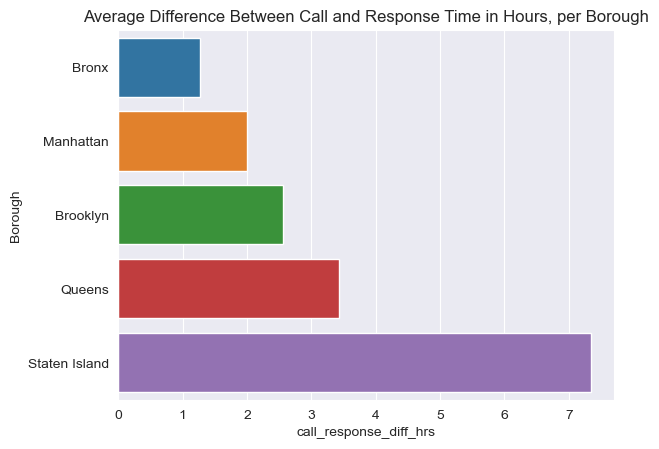

In [111]:
sns.barplot(data=response_by_borough, y='Borough', x='call_response_diff_hrs', orient='h')
plt.title('Average Difference Between Call and Response Time in Hours, per Borough')

Text(0.5, 1.0, 'Average Difference Between Call and Response Time for Top 10 Species, by Hours')

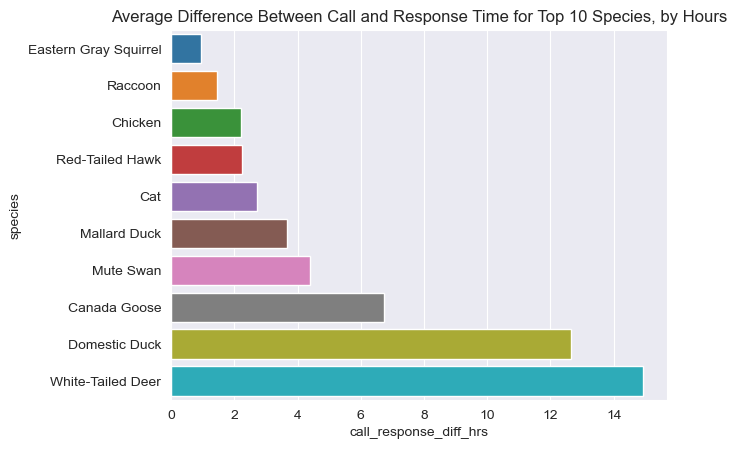

In [106]:
sns.barplot(data=response_by_species, y='species', x='call_response_diff_hrs', orient='h')
plt.title('Average Difference Between Call and Response Time in Hours, for Top 10 Species')

In [119]:
# What is the number of total responses per year?
responses_by_year = df.groupby('year').size().reset_index().rename(columns={0: 'Total Responses'})
responses_by_year

,year,Total Responses
0,2018,700
1,2019,631
2,2020,816
3,2021,462


Text(0.5, 1.0, 'Total Responses by Year')

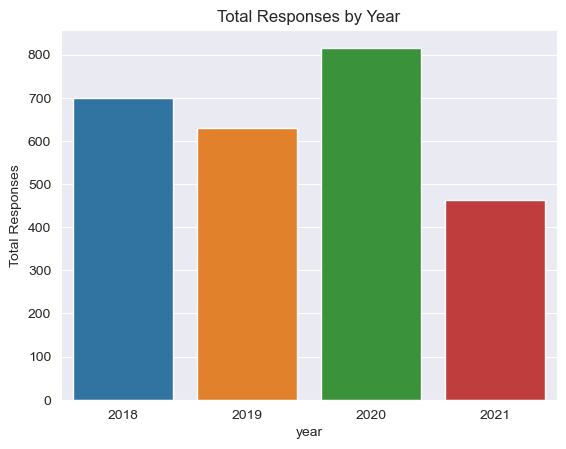

In [123]:
sns.barplot(data=responses_by_year, x='year', y='Total Responses')
plt.title('Total Responses by Year')

In [124]:
# What is the number of total responses per month?
responses_by_month = df.groupby('month').size().reset_index().rename(columns={0: 'Total Responses'})
responses_by_month

,month,Total Responses
0,1,165
1,2,128
2,3,163
3,4,206
4,5,233
5,6,273
6,7,305
7,8,322
8,9,221
9,10,221


In [207]:
month_dict = {
    '1': 'Jan',
    '2': 'Feb',
    '3': 'Mar',
    '4': 'Apr',
    '5': 'May',
    '6': 'Jun',
    '7': 'Jul',
    '8': 'Aug',
    '9': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

responses_by_month['month'] = responses_by_month['month'].astype('str')
responses_by_month['month'] = responses_by_month['month'].map(month_dict)


Text(0.5, 1.0, 'Total Responses by Month')

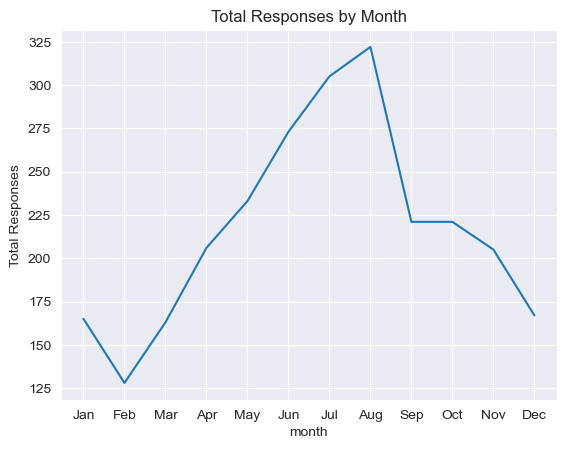

In [210]:
sns.lineplot(data=responses_by_month, x='month', y='Total Responses')
plt.title('Total Responses by Month')

Responses rise during the spring and summer months, peaking around August. The month with the lowest total number of responses is February. This may be due to increased animal activity in warmer weather, as well as people spending more time outdoors who happen to observe animal in need of assistance and make reports.

In [128]:
# What is the number of total responses by hour?
responses_by_hour = df.groupby('hour').size().reset_index().rename(columns={0: 'Total Responses'})
responses_by_hour

,hour,Total Responses
0,0,28
1,1,3
2,2,8
3,3,5
4,4,9
5,5,2
6,6,3
7,7,6
8,8,99
9,9,347


In [128]:
# What is the number of total responses by hour?
responses_by_hour = df.groupby('hour').size().reset_index().rename(columns={0: 'Total Responses'})
responses_by_hour

,hour,Total Responses
0,0,28
1,1,3
2,2,8
3,3,5
4,4,9
5,5,2
6,6,3
7,7,6
8,8,99
9,9,347


Text(0.5, 1.0, 'Total Responses by Hour')

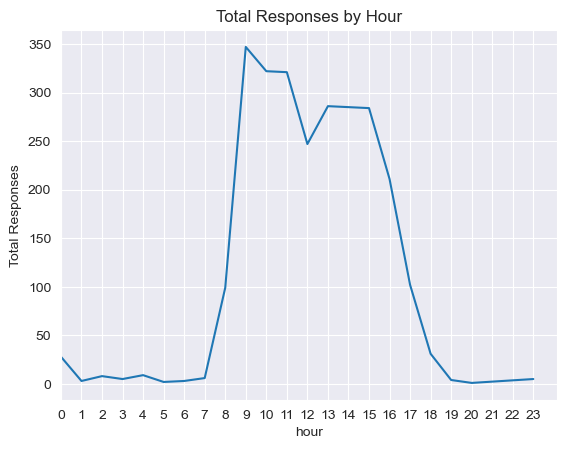

In [203]:
g = sns.lineplot(data=responses_by_hour, x='hour', y='Total Responses')
g.set_xticks(np.arange(0,24,1))
plt.xlim(0)
plt.title('Total Responses by Hour')

The vast majority of responses occur between 7 AM and 7 PM. The hour with the most responses is 9 AM, after which total responses dips but remains high until 3 PM. This makes sense as this window of time is when most people are awake to observe animals in need of assistance and make reports. 

In [ ]:
# What is the number of total responses by day of the week?
responses_by_weekday = df.groupby('weekday').size().reset_index().rename(columns={0: 'Total Responses'})
responses_by_weekday

In [196]:
weekday_dict = {
    '0': 'Mon',
    '1': 'Tues',
    '2': 'Wed',
    '3': 'Thur',
    '4': 'Fri',
    '5': 'Sat',
    '6': 'Sun'
}

responses_by_weekday['weekday'] = responses_by_weekday['weekday'].astype('str')
responses_by_weekday['weekday'] = responses_by_weekday['weekday'].map(weekday_dict)
responses_by_weekday

,weekday,Total Responses
0,Mon,319
1,Tues,395
2,Wed,433
3,Thur,419
4,Fri,408
5,Sat,337
6,Sun,298


Text(0.5, 1.0, 'Total Responses by Day of Week')

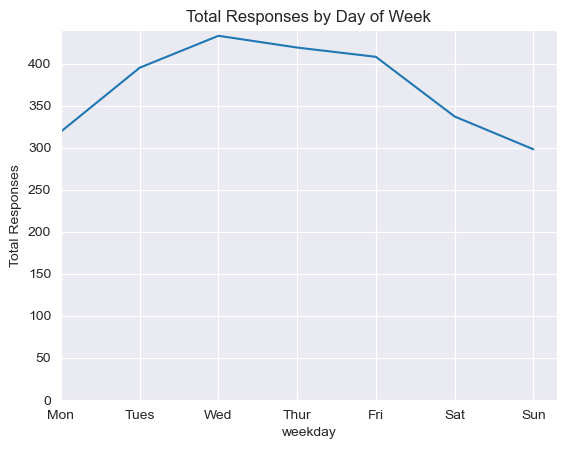

In [200]:
sns.lineplot(data=responses_by_weekday, x='weekday', y='Total Responses')
plt.ylim(0)
plt.xlim(0)
plt.title('Total Responses by Day of Week')

Animal assistance responses seem to go up slightly in the middle of the week. It seems unlikely that this is due to animals being more likely to be injured, die, etc. on Wednesday and Thursdays. Perhaps this might be related to different levels of park attendance on certain days of the week, since parks are where many of the requests are called to. Higher levels of park attendance on a certain day might lead to more requests for animal assistance. It might be interesting to procure data on park attendance and examine this hypothesis further. 

In [134]:
df['Animal Condition'].value_counts()

Healthy      719
Unhealthy    649
Injured      589
DOA          262
Name: Animal Condition, dtype: int64

In [150]:
# convert 'Animal Condition' to ordinal categorical type
df['Animal Condition'] = pd.Categorical(df['Animal Condition'], categories=['DOA', 'Injured', 'Unhealthy', 'Healthy'], ordered=True)

Text(0.5, 1.0, 'What condition was the animal(s) in?')

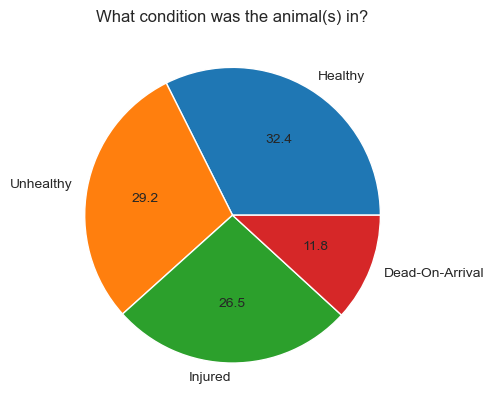

In [151]:
plt.pie(df['Animal Condition'].value_counts(), labels=['Healthy', 'Unhealthy', 'Injured', 'Dead-On-Arrival'], autopct='%.1f')
plt.title('What condition was the animal(s) in?')

In [155]:
# How did the condition of the animal differ by animal class?
animal_cond_heatmap = df.groupby(['Animal Class', 'Animal Condition'])['response_datetime'].count().unstack()

Text(0.5, 1.0, 'Condition by Animal Class')

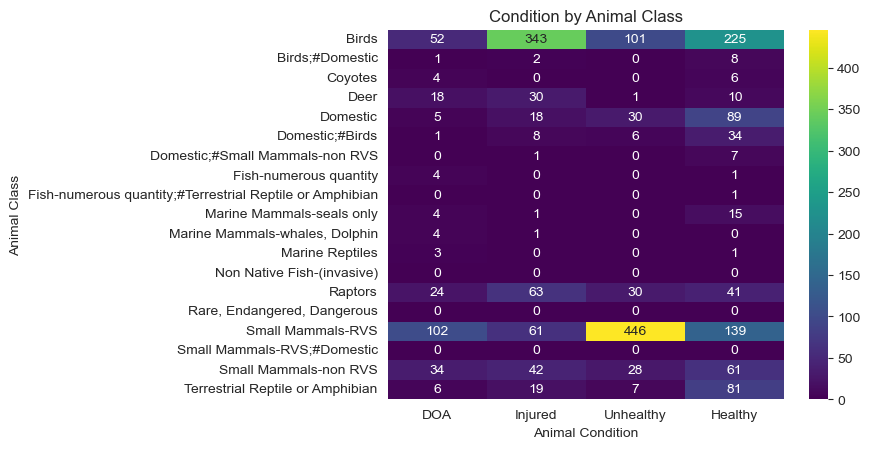

In [159]:
sns.heatmap(animal_cond_heatmap, annot=True, cmap='viridis', fmt='g')
plt.title('Condition by Animal Class')

In [212]:
# What are the most frequent properties where requests are called to?
calls_per_property = df['Property'].value_counts().reset_index().rename(columns={'index':'Property Name', 'Property': 'Total Calls'}).head(10)
calls_per_property

,Property Name,Total Calls
0,Central Park,598
1,Prospect Park,211
2,Van Cortlandt Park,99
3,Forest Park,74
4,Willowbrook Park,68
5,Marine Park,68
6,Pelham Bay Park,66
7,Clove Lakes Park,66
8,Inwood Hill Park,63
9,Riverside Park,54


Text(0.5, 1.0, 'Properties with the Most Total Calls')

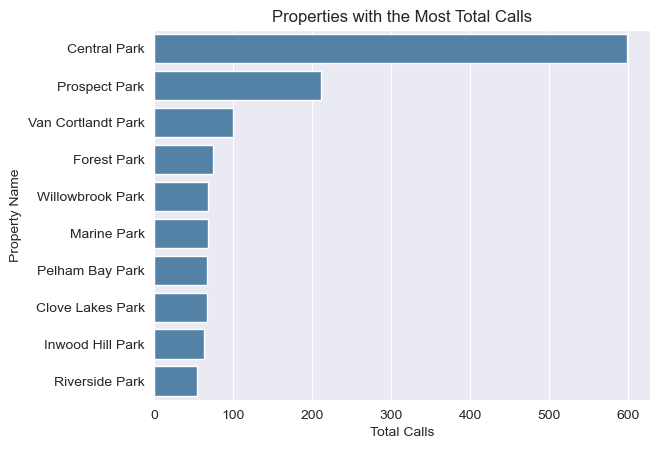

In [215]:
sns.barplot(data=calls_per_property, y='Property Name', x='Total Calls', orient='h', color='steelblue')
plt.title('Properties with the Most Total Calls')

It is not surprising that the most frequent requests for animal assistance come from parks. By a large margin, the most visited park in the city--Central Park--is the property that receives the highest number of requests.

In [167]:
# Does the number of animals involved correlated with duration of response?
df.corr()

/var/folders/w7/m_jjkwgd29qgvcnlj18kzz_80000gn/T/ipykernel_45839/2076053064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Duration of Response,num_animals,hours_monitoring,ESU Response,call_response_diff_hrs,year,month,hour,weekday
Duration of Response,1.000000,-0.005447,0.733914,0.131820,-0.028199,-0.037936,0.062971,-0.050841,-0.002436
num_animals,-0.005447,1.000000,-0.004214,-0.002322,0.002774,0.014868,0.000704,-0.008350,-0.003359
hours_monitoring,0.733914,-0.004214,1.000000,0.336981,-0.067563,-0.006894,0.025240,-0.053693,-0.083648
ESU Response,0.131820,-0.002322,0.336981,1.000000,-0.012031,0.003208,0.044617,0.013694,-0.011293
call_response_diff_hrs,-0.028199,0.002774,-0.067563,-0.012031,1.000000,-0.017543,0.025962,0.003954,0.008522
year,-0.037936,0.014868,-0.006894,0.003208,-0.017543,1.000000,-0.469063,0.063949,-0.018836
month,0.062971,0.000704,0.025240,0.044617,0.025962,-0.469063,1.000000,-0.060240,0.014030
hour,-0.050841,-0.008350,-0.053693,0.013694,0.003954,0.063949,-0.060240,1.000000,0.031472
weekday,-0.002436,-0.003359,-0.083648,-0.011293,0.008522,-0.018836,0.014030,0.031472,1.000000


Contrary to what I had suspected, the number of animals involved does not have much of a correlation with duration of response. 

Hours monitoring seems to have a moderately strong correlation with duration of response. Because no units are given for duration of response, it is hard to draw specific conclusions as to the magnitude of this relationship. However, it makes sense that time spent monitoring the animal adds to total response time.

In [190]:
# What is the percentage of requests that involved the Parks Enforcement Patrol?
df['PEP Response'].value_counts(normalize=True)

False    0.96089
True     0.03911
Name: PEP Response, dtype: float64

In [176]:
# What is the percentage of requests that involved the police?
df['Police Response'].value_counts(normalize=True)

False    0.981204
True     0.018796
Name: Police Response, dtype: float64

In [175]:
# What types of animal calls are more likely to involve the police?
df[df['Police Response']==True]['species'].value_counts()

Raccoon                  20
White-Tailed Deer        12
Dog                       4
Seal (Unknown)            3
Red-Tailed Hawk           2
Cat                       2
Baltimore Oriole          1
Harbor Seal               1
American Robin            1
Eastern Gray Squirrel     1
Eastern Coyote            1
Cooper'S Hawk             1
Name: species, dtype: int64

Only 0.02% of requests for animal assistance involved the police. Raccoons, white-tailed deer, and dogs were the most common species of animal involved in such calls.

In [178]:
# What is the distribution of the final action taken by the responding Urban Park Ranger?
df['Final Ranger Action'].value_counts()

ACC                              776
Unfounded                        588
Relocated/Condition Corrected    471
Monitored Animal                 315
Rehabilitator                    282
Advised/Educated others          145
Submitted for DEC Testing         32
Name: Final Ranger Action, dtype: int64

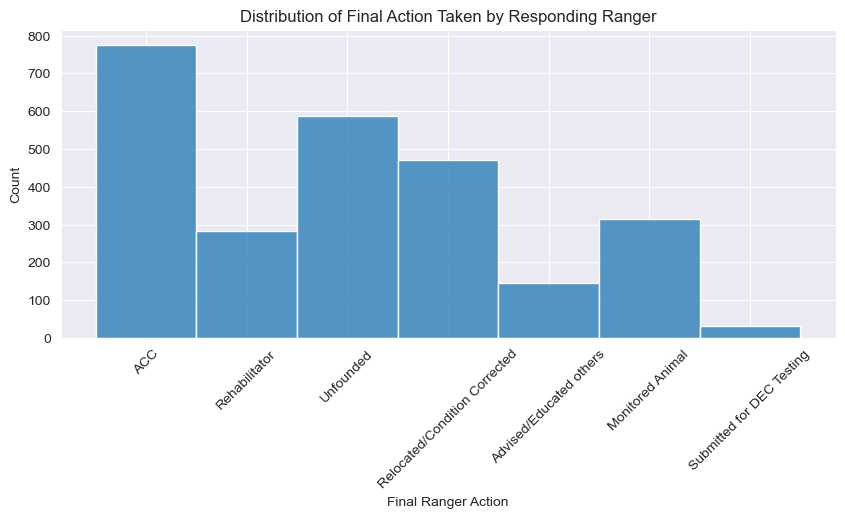

In [216]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Final Ranger Action')
plt.xticks(rotation=45)
plt.title('Distribution of Final Action Taken by Responding Ranger')
plt.show()

In [186]:
action_heatmap = df.groupby(['Animal Class', 'Final Ranger Action'])['response_datetime'].count().unstack()

Text(0.5, 1.0, 'Action Taken by Responding Ranger')

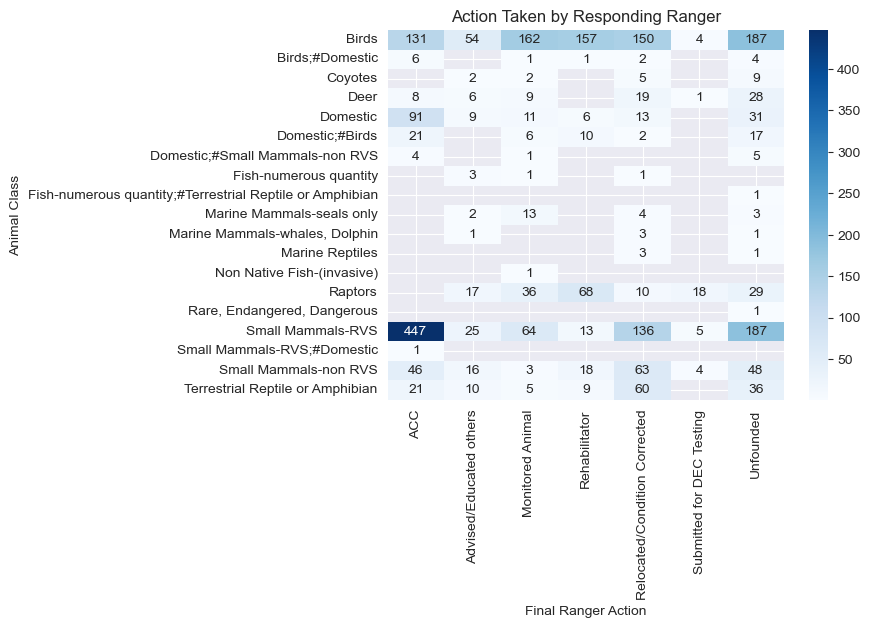

In [189]:
sns.heatmap(action_heatmap, annot=True, cmap='viridis', fmt='g')
plt.title('Action Taken by Responding Ranger')

Text(0.5, 1.0, 'Total Requests by Date')

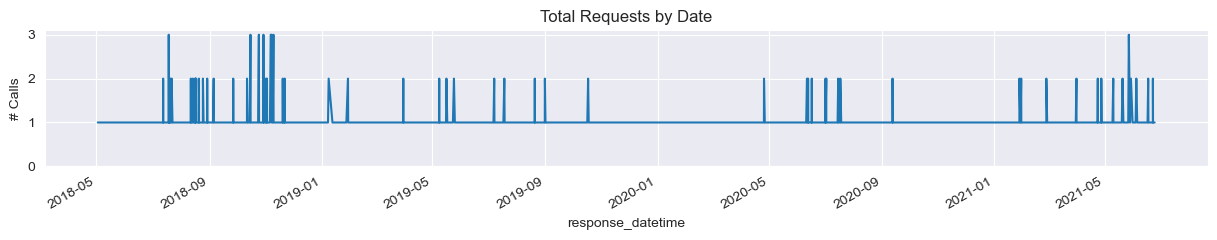

In [238]:
df.groupby('response_datetime').count().plot.line(use_index = True, y = 'call_datetime', figsize= (15,2), legend = None)
plt.ylabel('# Calls')
plt.ylim(0)
plt.title('Total Requests by Date')

In [270]:
df.groupby('response_datetime').size().value_counts()

1    2483
2      51
3       8
dtype: int64

The vast majority of days in the dataset (2483) had the rangers responding to a single request per day. 51 days had 2 responses, and 8 days had 3 responses. 

In [255]:
wkdy_hr_heatmap = df.groupby(['weekday','hour']).count().unstack()['response_datetime']
wkdy_hr_heatmap

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23
weekday,,,,,,,,,,,,,,,,,,,,,,
0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,11.0,45.0,35.0,36.0,40.0,37.0,39.0,42.0,18.0,7.0,1.0,1.0,NaN,NaN
1,3.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,13.0,53.0,51.0,60.0,29.0,41.0,46.0,46.0,23.0,24.0,NaN,NaN,NaN,1.0
2,2.0,NaN,NaN,NaN,1.0,NaN,NaN,3.0,22.0,55.0,63.0,52.0,41.0,50.0,48.0,38.0,35.0,14.0,7.0,1.0,NaN,1.0
3,7.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,18.0,62.0,58.0,56.0,35.0,40.0,47.0,35.0,30.0,20.0,5.0,NaN,NaN,NaN
4,7.0,NaN,2.0,3.0,2.0,1.0,NaN,NaN,16.0,56.0,44.0,34.0,36.0,45.0,44.0,47.0,47.0,15.0,5.0,1.0,NaN,3.0
5,2.0,NaN,1.0,NaN,1.0,NaN,3.0,2.0,12.0,45.0,40.0,30.0,34.0,40.0,33.0,37.0,35.0,17.0,5.0,NaN,NaN,NaN
6,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,7.0,31.0,31.0,53.0,32.0,33.0,28.0,39.0,23.0,5.0,8.0,1.0,1.0,NaN


Text(0.5, 1.0, 'Total Responses by Day of Week and Hour')

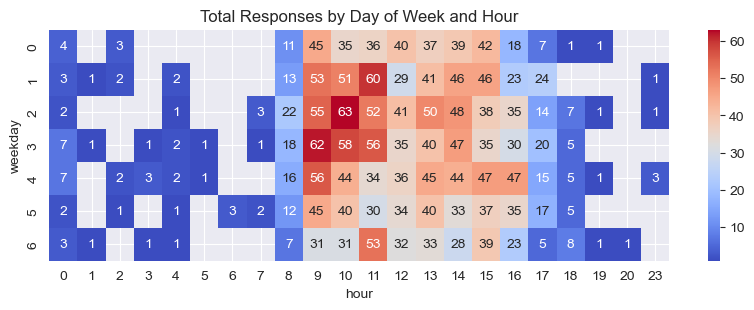

In [256]:
plt.figure(figsize=(10,3))
sns.heatmap(wkdy_hr_heatmap, annot=True, cmap='coolwarm')
plt.title('Total Responses by Day of Week and Hour')

The highest density of responses occurs during midday in the middle of the week.

In [257]:
month_yr_heatmap = df.groupby(['year','month']).count().unstack()['response_datetime']
month_yr_heatmap

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,3.0,17.0,140.0,198.0,79.0,98.0,110.0,55.0
2019,41.0,44.0,70.0,55.0,51.0,62.0,67.0,57.0,51.0,53.0,38.0,42.0
2020,54.0,45.0,41.0,53.0,68.0,102.0,98.0,67.0,91.0,70.0,57.0,70.0
2021,70.0,39.0,52.0,98.0,111.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total Responses by Month and Year')

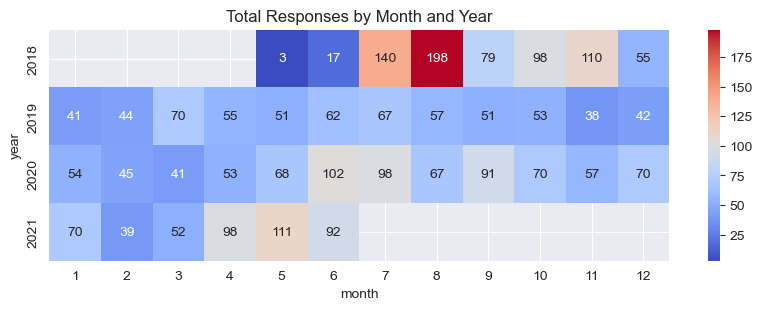

In [259]:
plt.figure(figsize=(10,3))
sns.heatmap(month_yr_heatmap, annot=True, cmap='coolwarm', fmt='g')
plt.title('Total Responses by Month and Year')

July and August of 2018 had more animal assistance requests than any other month in this dataset. What could have been the cause of this?

In [261]:
df_aug18 = df[(df['year']==2018)&(df['month']==8)]

In [264]:
df_aug18['Borough'].value_counts(normalize=True)

Manhattan        0.868687
Queens           0.060606
Brooklyn         0.025253
Staten Island    0.025253
Bronx            0.020202
Name: Borough, dtype: float64

In [265]:
df['Borough'].value_counts(normalize=True)

Manhattan        0.367957
Brooklyn         0.176696
Queens           0.175546
Staten Island    0.173246
Bronx            0.106554
Name: Borough, dtype: float64

More than twice the usual proportion of responses came from Manhattan in August of 2018 (86.9% vs 36.8%).

In [268]:
df_aug18['species'].value_counts(normalize=True)

Raccoon                  0.818182
Red-Tailed Hawk          0.035354
Gull (Unknown)           0.020202
Eastern Gray Squirrel    0.015152
Herring Gull             0.015152
Domestic Rabbit          0.010101
White-Tailed Deer        0.010101
Red-Eared Slider         0.010101
Peregrine Falcon         0.005051
Green Iguana             0.005051
House Sparrow            0.005051
Mourning Dove            0.005051
Canada Goose             0.005051
Gerbil                   0.005051
Black-Backed Gull        0.005051
Cat                      0.005051
Chicken                  0.005051
Bearded Dragon           0.005051
Dog                      0.005051
Rock Dove                0.005051
American Kestrel         0.005051
Name: species, dtype: float64

In [269]:
df['species'].value_counts(normalize=True)

Raccoon                           0.313530
Canada Goose                      0.067842
Red-Tailed Hawk                   0.048294
Eastern Gray Squirrel             0.037179
Mallard Duck                      0.029130
Chicken                           0.027980
White-Tailed Deer                 0.027213
Cat                               0.024530
Domestic Duck                     0.023764
Mute Swan                         0.022231
Dog                               0.021464
Virginia Opossum                  0.021081
Red-Eared Slider                  0.018015
Herring Gull                      0.016481
Rock Dove                         0.015332
Double-Crested Cormorant          0.015332
Striped Skunk                     0.013415
Bird (Unknown)                    0.013032
American Robin                    0.011882
Common Snapping Turtle            0.011499
Gull (Unknown)                    0.007282
Great Blue Heron                  0.006899
Eastern Coyote                    0.006899
Domestic Ra

Raccoons made up more than twice the usual proportion of species in responses to animal assistance requests. Could something have happened with raccoons in Manhattan in August 2018?

After a little research on Google, I discovered that in the summer of 2018, there was an outbreak of canine distemper virus among the raccoon population in Central Park, which is located in Manhattan. This is probably the reason behind the spike in animal assistance requests coming from Manhattan in August 2018.

Sources/further reading: 
- https://nypost.com/2018/07/21/dozens-of-raccoons-die-from-viral-zombie-outbreak-in-central-park/
- https://nypost.com/2018/08/04/more-zombie-raccoons-die-in-central-park/